In [3]:
import numpy as np
from szegedy import SzegedyRandomWalk
import matplotlib.pyplot as plt

## Experimental

In [21]:
def probability_graph(N, resetting_rate, t=100, starting_vec=None):
    # crete the matrix
    matrix = np.zeros((N, N), dtype=np.float128)
    # add loop for starting point
    matrix[0][0] = 1
    
    # add resetting edges and loops
    for j in range(1, N):
        matrix[j][0] = resetting_rate
        matrix[j][j] = 1 - matrix[j][0]
        
    szegedy = SzegedyRandomWalk(matrix)
    
    # starting position
    if starting_vec is None:
        initial_state = np.ones(N, dtype=np.float128) / np.sqrt(N - 1, dtype=np.float128)
        initial_state[0] = 0
        initial_state_H = np.kron(initial_state, initial_state) 
    else:
        initial_state_H = starting_vec

    # perform walk
    probabilities = []
    state = initial_state_H
    for i in range(t):
        state = szegedy.operator @ state
        probabilities.append(np.power(state, 2).reshape((N, N)).sum(axis=1)[0])
        
    return probabilities

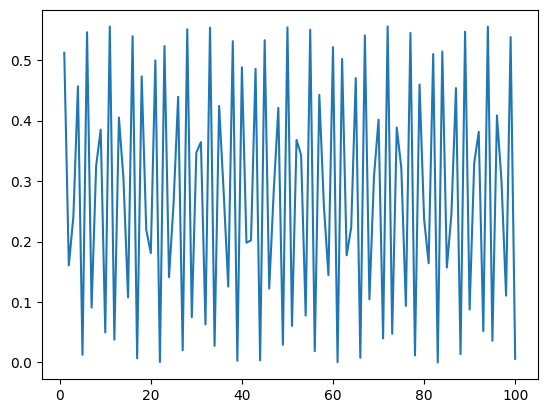

In [22]:
plt.plot([i for i in range(1,101)], probability_graph(2, 0.2,t=100,starting_vec=[0, 0, 0.2**0.5, (1-0.2)**0.5]))
plt.show()

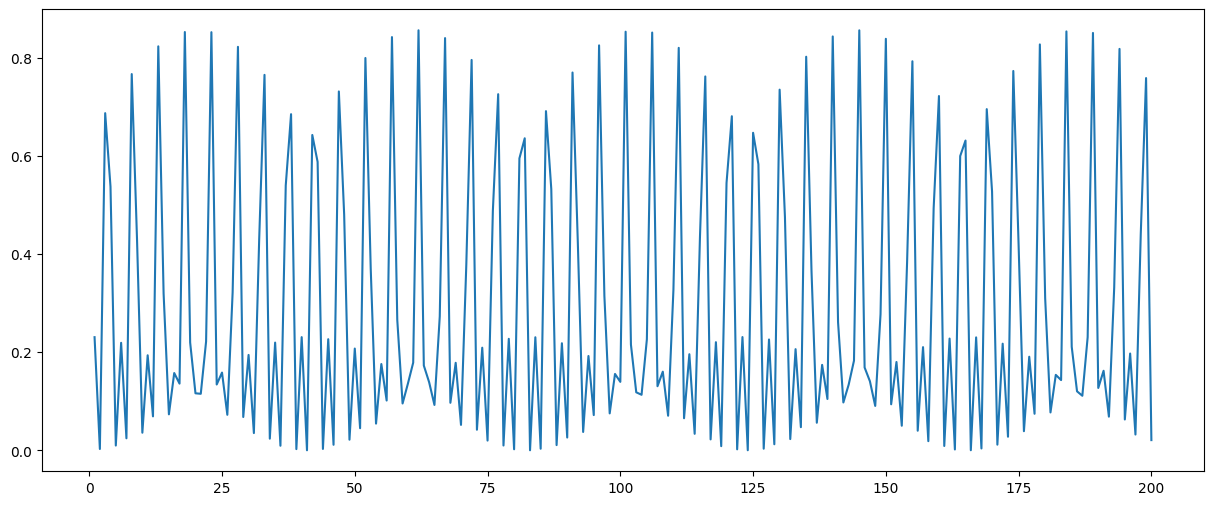

In [24]:
plt.figure(figsize=(15,6))
plt.plot([i for i in range(1,201)], probability_graph(2, 0.2,200))
plt.show()

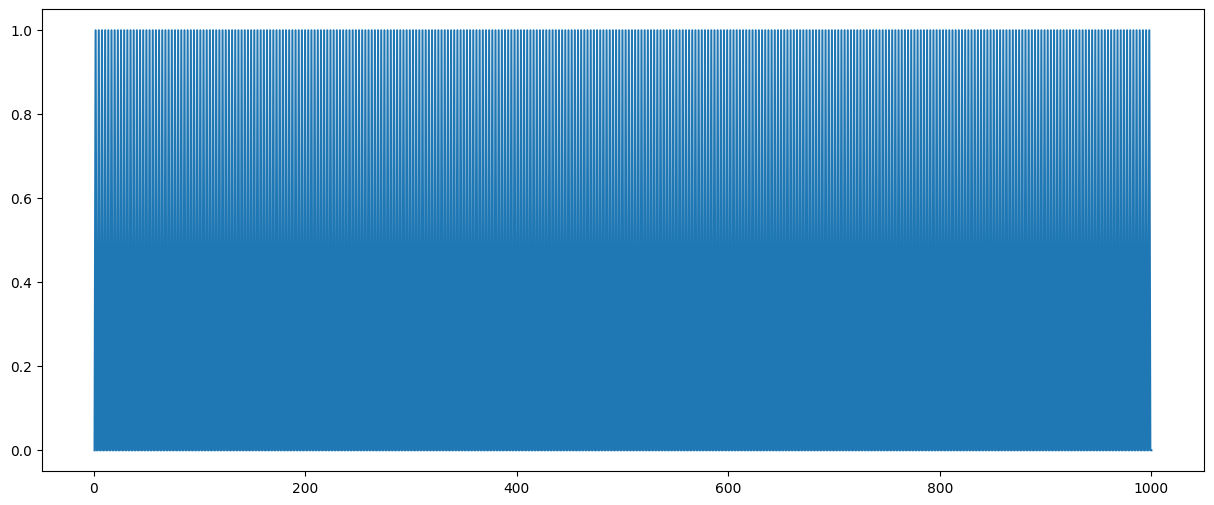

In [4]:
plt.figure(figsize=(15,6))
plt.plot([i for i in range(1,1001)], probability_graph(2, 0.5,1000))
plt.show()

## Manual calculation

In [3]:
p=0.2

In [4]:
a=1-2*p
b=p-p**2
c=2 * (p-p**2)**0.5

In [6]:
def next_vector(current):
    return [0, a * current[1] + 4 * b * current[2]+c * a *current[3], a *current[2]-c*current[3], -c*current[1] + c*a*current[2] + a**2*current[3]]

In [14]:
def manual_vector_of_probabilities(n = 100):
    current_v = [0, c*a, -c, a**2]
    probabilities = [(c*a)**2]
    for i in range(2, n+1):
        current_v = next_vector(current_v)
        probabilities.append(current_v[1]**2)
    return probabilities

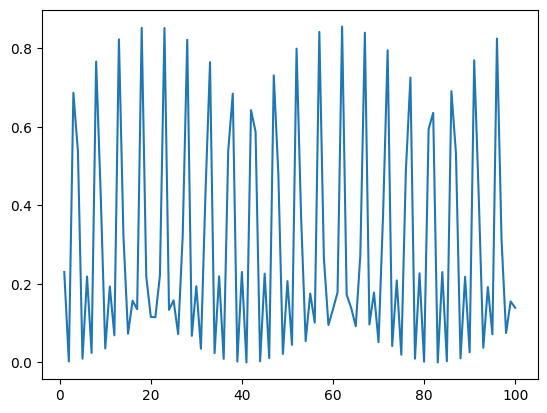

In [15]:
plt.plot([i for i in range(1, 101)], manual_vector_of_probabilities())
plt.show()

## N=3

In [28]:
def next_vector_3(current):
    return [0, a*current[1]+4*b*current[3]+a*c*current[4], a*current[2]+4*b*current[6]+a*c*current[8], a*current[3] - 2*c*current[4], -c*current[1]+a*c*current[3]+a**2*current[4], current[5], a*current[6] - c*current[8], current[7], -c*current[2]+a*c*current[6]+a**2*current[8]]

In [31]:
def manual_vector_of_probabilities_3(n = 100):
    current_v = [0, c*a / 2, c*a / 2, -c, a**2/2, 0.5, -c/2, 0.5, a**2/2]
    probabilities = [(c*a/2)**2 + (c*a / 2)**2]
    for i in range(2, n+1):
        print(current_v)
        current_v = next_vector_3(current_v)
        probabilities.append(current_v[1]**2 + current_v[2]**2)
    return probabilities

In [37]:
b*4

0.64

[0, 0.24, 0.24, -0.8, 0.18, 0.5, -0.4, 0.5, 0.18]
[0, -0.2816, -0.025600000000000026, -0.768, -0.5112000000000001, 0.5, -0.384, 0.5, -0.31920000000000004]
[0, -0.905856, -0.41433600000000004, 0.3571200000000002, -0.32739199999999996, 0.5, 0.024960000000000038, 0.5, -0.278752]
[0, -0.4721049599999998, -0.36642816, 0.7380992000000001, 0.77824128, 0.5, 0.23797760000000004, 0.5, 0.24309888000000007]
[0, 0.5626763264000002, 0.049136230400000064, -0.802326528, 1.0121384448, 0.5, -0.05169254400000006, 0.5, 0.49488737280000006]
[0, 0.309943271424, 0.23394444902400002, -2.10081742848, -0.4708879544320002, 0.5, -0.4269254246400001, 0.5, 0.11403804876799992]
[0, -1.3845834095001601, -0.0781273389465601, -0.5070697299967997, -1.42586664640512, 0.5, -0.34738569379839995, 0.5, -0.35102606548992005]
[0, -1.8396906631725054, -0.43769575883407363, 1.9771447962501123, 0.3509612644958212, 0.5, 0.07238943611289608, 0.5, -0.2306126454423551]
[0, 0.33001967865456305, -0.3269822860005211, 0.6247488545567533,

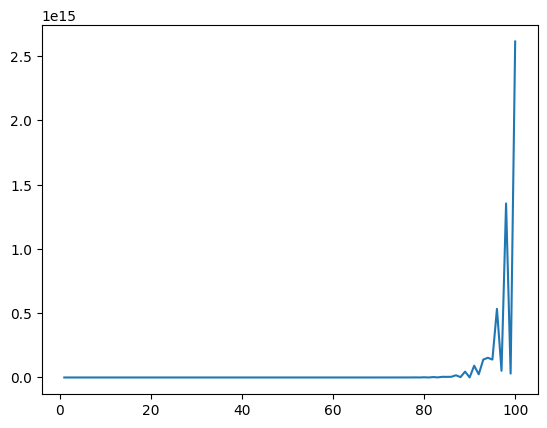

In [32]:
plt.plot([i for i in range(1, 101)], manual_vector_of_probabilities_3())
plt.show()